In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import stats

from sklearn.metrics import mean_squared_error

In [2]:
bp = pd.read_csv('bp.csv')

In [3]:
bp_98109 = bp[bp['Zipcode'] == '98109'].reset_index(drop = True)
bp_98109['Category'].replace(['SINGLE FAMILY / DUPLEX', 'MULTIFAMILY'], 'HOUSING',inplace = True)
bp_98109_housing = bp_98109[bp_98109['Category'] == 'HOUSING'].reset_index(drop = True)
bp_98109_com = bp_98109[bp_98109['Category'] == 'COMMERCIAL'].reset_index(drop = True)
df_98109 = pd.DataFrame()

In [4]:
#2014-2017 housing count
count_housing_list = []
count_com_list = []
year_month = []

for j in [2014,2015,2016,2017]:
    for i in range(12):
        count_housing = len(bp_98109_housing[(bp_98109_housing['Expected Construct Year'] == j) & 
                     (bp_98109_housing['Expected Construct Month'] == i+1)])
        count_com = len(bp_98109_com[(bp_98109_com['Expected Construct Year'] == j) & 
                     (bp_98109_com['Expected Construct Month'] == i+1)])
        date = str(j) + '-' + str(i+1)
        count_housing_list.append(count_housing)
        count_com_list.append(count_com)
        year_month.append(date)
        
df_98109['COMMERCIAL'] = count_com_list
df_98109['HOUSING'] = count_housing_list
df_98109['Year&Month'] = year_month

In [5]:
#sum them for 9 months
HOUSING_sum_list = []
COM_sum_list = []
for i in range(len(df_98109)):
    HOUSING_sum = sum(df_98109['HOUSING'][i:i + 6])
    HOUSING_sum_list.append(HOUSING_sum)
    COM_sum = sum(df_98109['COMMERCIAL'][i:i + 6])
    COM_sum_list.append(COM_sum)
df_98109['HOUSING_sum'] = HOUSING_sum_list
df_98109['COM_sum'] = COM_sum_list

#df_98109.drop(df_98109.index[41:],inplace = True)

print(stats.ttest_ind(df_98109['HOUSING_sum'],df_98109['COM_sum']))

Ttest_indResult(statistic=-0.036597302559268359, pvalue=0.97088370218874087)


In [6]:
x = df_98109['HOUSING_sum'].values.reshape(48,1)
y = df_98109['COM_sum'].values

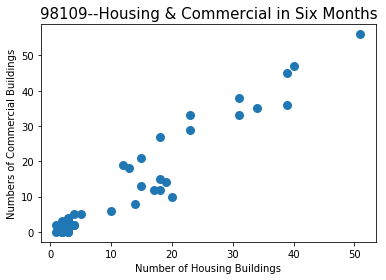

In [7]:
plt.scatter(x,y,lw='3',label='actual')
#plt.plot(x,y_pred,label='fit')

plt.title("98109--Housing & Commercial in Six Months",fontsize=15)
plt.xlabel("Number of Housing Buildings")
plt.ylabel("Numbers of Commercial Buildings")

#plt.legend(loc='lower right')
plt.savefig('Fig.98109-6months.png' , dpi=400) 
plt.show()

In [ ]:
r2_score(y, pred)  